In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
poles = ctrl.Antecedent(np.arange(2, 22, 2), 'poles')
voltage = ctrl.Antecedent(np.arange(0, 22, 2),'voltage')
frequency = ctrl.Antecedent(np.arange(20, 401, 10),'frequency')
speed = ctrl.Consequent(np.arange(0, 22, 1),'speed')


In [3]:
#membership function

poles['lower'] = fuzz.trimf(poles.universe,[2,2,6])
poles['average'] = fuzz.trimf(poles.universe,[4,8,14])
poles['greater'] = fuzz.trimf(poles.universe,[10,20,21])

voltage['poor'] = fuzz.trimf(voltage.universe,[0,0,8])
voltage['average'] = fuzz.trimf(voltage.universe,[7,8,12])
voltage['good'] = fuzz.trimf(voltage.universe,[10,20,21])


frequency['poor'] = fuzz.trimf(frequency.universe,[20,20,50])
frequency['average'] = fuzz.trimf(frequency.universe,[40,200,300])
frequency['good'] = fuzz.trimf(frequency.universe,[250,400,401])



In [4]:
speed['Vlow'] = fuzz.trimf(speed.universe,[0,0,2])
speed['low'] = fuzz.trimf(speed.universe,[1,2,4])
speed['medium'] = fuzz.trimf(speed.universe,[3,6,10])
speed['high'] = fuzz.trimf(speed.universe,[8,12,16])
speed['Vhigh'] = fuzz.trimf(speed.universe,[14,18,21])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


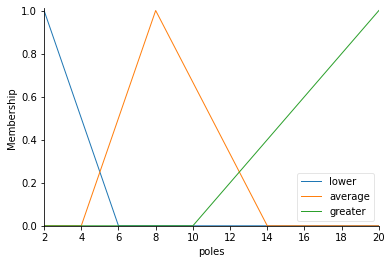

In [5]:
poles.view()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


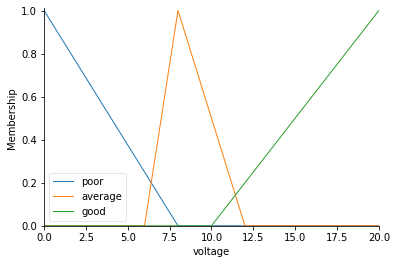

In [6]:
voltage.view()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


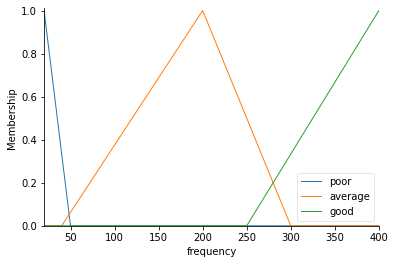

In [7]:
frequency.view()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


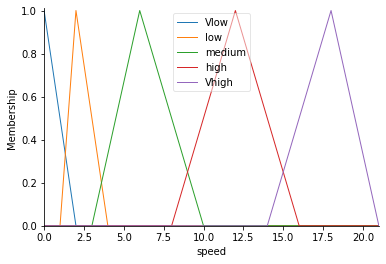

In [8]:
speed.view()

In [9]:

rule1 = ctrl.Rule(poles['greater'] & frequency['good'] & voltage['good'], speed['medium'])

rule2 = ctrl.Rule(poles['greater'] & frequency['good'] & voltage['average'], speed['medium'])

rule3 = ctrl.Rule(poles['greater'] & frequency['good'] & voltage['poor'], speed['medium'])

rule4 = ctrl.Rule(poles['greater'] & frequency['average'] & voltage['good'], speed['low'])

rule5 = ctrl.Rule(poles['greater'] & frequency['average'] & voltage['average'], speed['low'])

rule6 = ctrl.Rule(poles['greater'] & frequency['average'] & voltage['poor'], speed['low'])

rule7 = ctrl.Rule(poles['greater'] & frequency['poor'] & voltage['good'], speed['Vlow'])

rule8 = ctrl.Rule(poles['greater'] & frequency['poor'] & voltage['average'], speed['Vlow']) 

rule9 = ctrl.Rule(poles['greater'] & frequency['poor'] & voltage['poor'], speed['Vlow'])


rule10 = ctrl.Rule(poles['average'] & frequency['good'] & voltage['good'], speed['high'])

rule11 = ctrl.Rule(poles['average'] & frequency['good'] & voltage['average'], speed['high'])

rule12 = ctrl.Rule(poles['average'] & frequency['good'] & voltage['poor'], speed['high'])

rule13 = ctrl.Rule(poles['average'] & frequency['average'] & voltage['good'], speed['medium'])

rule14 = ctrl.Rule(poles['average'] & frequency['average'] & voltage['average'], speed['medium'])

rule15 = ctrl.Rule(poles['average'] & frequency['average'] & voltage['poor'], speed['medium'])

rule16 = ctrl.Rule(poles['average'] & frequency['poor'] & voltage['good'], speed['low'])

rule17 = ctrl.Rule(poles['average'] & frequency['poor'] & voltage['average'], speed['low'])

rule18 = ctrl.Rule(poles['average'] & frequency['poor'] & voltage['poor'], speed['low'])


rule19 = ctrl.Rule(poles['lower'] & frequency['good'] & voltage['good'], speed['Vhigh'])

rule20 = ctrl.Rule(poles['lower'] & frequency['good'] & voltage['average'], speed['Vhigh'])

rule21 = ctrl.Rule(poles['lower'] & frequency['good'] & voltage['poor'], speed['Vhigh'])

rule22 = ctrl.Rule(poles['lower'] & frequency['average'] & voltage['good'], speed['high'])

rule23 = ctrl.Rule(poles['lower'] & frequency['average'] & voltage['average'], speed['high']) 

rule24 = ctrl.Rule(poles['lower'] & frequency['average'] & voltage['poor'], speed['medium'])

rule25 = ctrl.Rule(poles['lower'] & frequency['poor'] & voltage['good'], speed['medium'])

rule26 = ctrl.Rule(poles['lower'] & frequency['poor'] & voltage['average'], speed['medium'])

rule27 = ctrl.Rule(poles['lower'] & frequency['poor'] & voltage['poor'], speed['medium'])



In [10]:
speedControl_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,
                                       rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23,
                                       rule24, rule25, rule26, rule27])
speedControl = ctrl.ControlSystemSimulation(speedControl_ctrl)

In [11]:
speedControl.input['poles'] = 20
speedControl.input['frequency'] = 400
speedControl.input['voltage'] = 20

# Crunch the numbers
speedControl.compute()

6.333333333333335


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


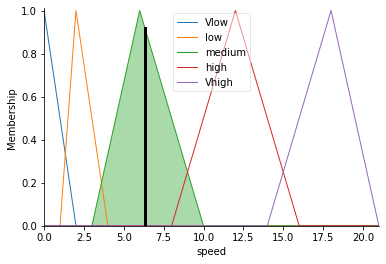

In [12]:
print(speedControl.output['speed'])
speed.view(sim=speedControl)
